<h2>To predict the price of a home, based on multiple different variables</h2><br>
The basic flow of steps would be:<br>
    1. importing all the dependent modules and libraries<br>
    2. importing the california house data set<br>
    3. creating a dataframe for the data for easier viewing<br>
    4. creating an instance of the regression model<br>
    5. splitting the data into test and train sets<br>
    6. training/'fitting' the train set to find a line of best fit<br>
    7. using the model, predict the values of y off of the test set<br>
    8. plot a graph of actual values v/s predicted values<br>
    9. calculate mean squared error to check accuracy of the model<br>
    10. closer the mean squared error to zero, more accurate the model<br>

In [1]:
#importing all the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#importing the california house dataset
from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()
print(california)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Here, data refers to the x values<br>
target refers to the y values<br>
feature names refer to the column names

In [3]:
#creating dataframes
df_x=pd.DataFrame(california.data,columns=california.feature_names)
df_y=pd.DataFrame(california.target)

In [4]:
df_x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df_x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
#printing the shape of x values
df_x.shape

(20640, 8)

In [7]:
#printing the shape of y values
df_y.shape

(20640, 1)

In [8]:
#creating the regression model
reg=linear_model.LinearRegression()

#splitting the data into train and test sets
#the train_test_split function works on a permutation-combination model so the train and test sets change each time
#the random_state parameter makes sure that the same permutation-combination is used each time, thereby not changing data
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.33,random_state=42)

In [9]:
#training the model using the train sets
reg.fit(x_train,y_train)

LinearRegression()

In [10]:
#predicting y values from the x test set using the model we just trained
y_pred=reg.predict(x_test)

Text(0.5, 1.0, 'Given Prices v/s Predicted Prices')

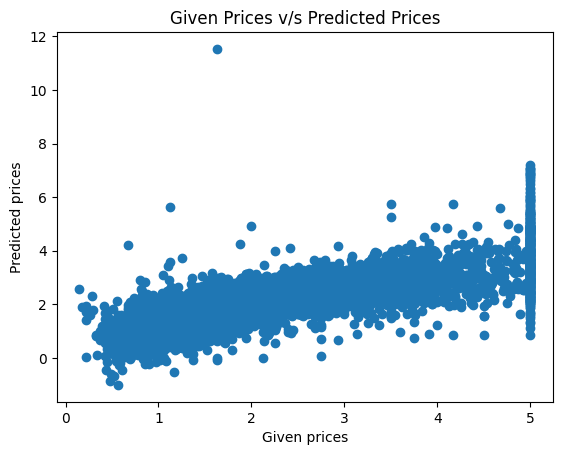

In [11]:
#plotting
%matplotlib inline
plt.scatter(y_test,y_pred)
plt.xlabel("Given prices")
plt.ylabel("Predicted prices")
plt.title("Given Prices v/s Predicted Prices")

In [14]:
#calculating mean squared error 
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

0.732781450595774
0.5970494128783946
